<a href="https://colab.research.google.com/github/milenaauzier/Supervised-Learning-With-Scikit-Learn/blob/main/Regress%C3%A3o_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regressão Logistica**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression

In [5]:
titanic = pd.read_csv('/content/train.csv')

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic = titanic.dropna(subset=['Age'])

In [9]:
x = titanic[['Age', 'Fare']]

In [10]:
y = titanic['Survived']

In [11]:
lr = LogisticRegression(solver = 'liblinear')

In [12]:
scores = cross_val_score(lr, x, y, cv = 10, scoring = 'accuracy')

In [13]:
print('Acurácia média:', scores.mean())

Acurácia média: 0.6568661971830986


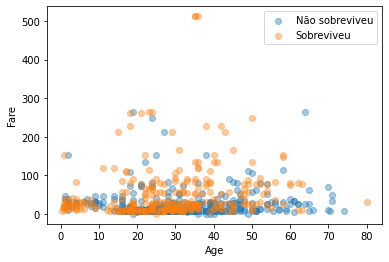

In [17]:
def plot_scatter():
    plt.scatter(x['Age'][y == 0], x['Fare'][y == 0], alpha=.4, label='Não sobreviveu')
    plt.scatter(x['Age'][y == 1], x['Fare'][y == 1], alpha=.4, label='Sobreviveu')
    plt.legend()
    plt.xlabel('Age')
    plt.ylabel('Fare')
plot_scatter()

In [18]:
pessoas = [[20, 500], # pessoa 1
           [75, 100]] # pessoa 2
lr.fit(x, y)
print('Classificações:', lr.predict(pessoas))
print('Probabilidades:\n', lr.predict_proba(pessoas))

Classificações: [1 0]
Probabilidades:
 [[3.92078070e-04 9.99607922e-01]
 [5.06575178e-01 4.93424822e-01]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


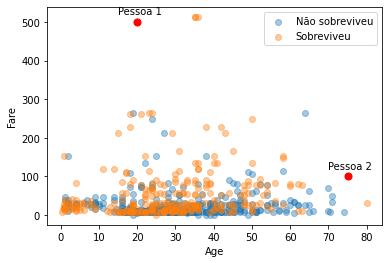

In [19]:
plt.scatter([20, 75], [500, 100], c='red', s=50)
plt.annotate('Pessoa 1', (15, 520))
plt.annotate('Pessoa 2', (70, 120))
plot_scatter()